In [1]:
import specim_test.specim.imfuncs  as im
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.io import fits
from astropy.modeling import models
from astropy.coordinates import SkyCoord, Angle
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.style.use('../../plot_style.txt')

from specim_test.specim.specfuncs import spec1d, spec2d, echelle2d

In [2]:
im_file_loc = ['../Target_image_file/B0445+123/B0445_nirc2_n_Kp_6x6.fits',
               '../Target_image_file/B0631+519/B0631_nirc2_n_Kp_6x6.fits',
               '../Target_image_file/PSJ0147+4630_F814W_drc_sci.fits',
               '../Target_image_file/J0818-2613/idxo14020_drc.fits', 
               '../Target_image_file/0924_nirc2n_sharp_Kp.fits',
               '../Target_image_file/J1433+6007/idgc07010_drc.fits',
               '../Target_image_file/J1817+2729/idxo16020_drc.fits']

In [16]:
target_info = []
key = ['TARGNAME', 'RA', 'DEC', 'TELESCOP', 'INSTRUME', 'FILTER', 'EXPTIME', 'PR_INV_L', 'PROPOSID']

for i, p in enumerate(im_file_loc):
    sp = fits.open(p)
    hd = sp[0].header
    info = []
    for k in key:
        try: 
            info.append(hd[k])#hd[k] is None:
            #info.append('None')
        except:
            info.append('None')
        #else:
            #info.append(hd[k])
    target_info.append(info)  
    
    for k, inf in zip(key, info):
        print('%s : %s' %(k, inf), sep=' ',end=' ', flush=False)
    print('\n')

TARGNAME : None RA : 72.091625 DEC : 12.46539166666667 TELESCOP : None INSTRUME : None FILTER : None EXPTIME : 4800.0 PR_INV_L : None PROPOSID : None 

TARGNAME : None RA : 98.80130833333331 DEC : 51.95050000000001 TELESCOP : None INSTRUME : None FILTER : None EXPTIME : 11280.0 PR_INV_L : None PROPOSID : None 

TARGNAME : PSJ0147+4630 RA : None DEC : None TELESCOP : HST INSTRUME : WFC3 FILTER : F814W EXPTIME : 1348.0 PR_INV_L : Treu PROPOSID : 15320 

TARGNAME : J0818-2613 RA : None DEC : None TELESCOP : HST INSTRUME : WFC3 FILTER : F814W EXPTIME : 1428.0 PR_INV_L : Treu PROPOSID : 15652 

TARGNAME : None RA : None DEC : None TELESCOP : Keck II INSTRUME : NIRC2 FILTER : Kp + clear EXPTIME : 4200.0 PR_INV_L : None PROPOSID : None 

TARGNAME : SDSSJ1433+6007 RA : None DEC : None TELESCOP : HST INSTRUME : WFC3 FILTER : F475X EXPTIME : 1504.0 PR_INV_L : Treu PROPOSID : 15320 

TARGNAME : J1817+2729 RA : None DEC : None TELESCOP : HST INSTRUME : WFC3 FILTER : F814W EXPTIME : 1428.0 PR_INV_L


Loading file ../Target_image_file/B0445+123/B0445_nirc2_n_Kp_6x6.fits
-----------------------------------------------
Pixel scale (x, y): (  0.010,   0.010) arcsec/pix
Instrument FOV (arcsec):     6.0 x     6.0
Image position angle (E of N):   -0.00
in display, going to set_subim False
in set_subim, going to poststamp_radec False
in poststamp_radec, going to cutout_radec False
in cutout_radec False

Calculating display limits
--------------------------
 Clipped mean: 0.027179
 Clipped rms:  0.066024
 fmin (mean -   1 sigma):  -0.038845
 fmax (mean +  18 sigma):  1.215617


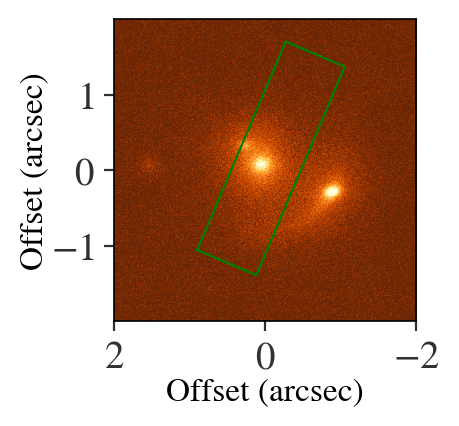

In [36]:
plt.figure(figsize=(2, 2))
for i, fl in enumerate(im_file_loc[:1]):
    myim = im.Image(fl)
    #myim.display()
    myim.display(imcent=None, imsize=4.0, fmax=18, fixnans=True)
    myim.mark_fov(ra=coordinates[i][0]+0.00025, dec=coordinates[i][1]-0.00025,  size=[0.85, 3.0], pa=PA[i],
                 lw=0.8)


Loading file ../Target_image_file/B0631+519/B0631_nirc2_n_Kp_6x6.fits
-----------------------------------------------
Pixel scale (x, y): (  0.010,   0.010) arcsec/pix
Instrument FOV (arcsec):     6.0 x     6.0
Image position angle (E of N):   -0.00
in display, going to set_subim False
in set_subim, going to poststamp_radec False
in poststamp_radec, going to cutout_radec False
in cutout_radec False

Calculating display limits
--------------------------
 Clipped mean: 0.009697
 Clipped rms:  0.041596
 fmin (mean -   1 sigma):  -0.031898
 fmax (mean +  18 sigma):  0.758424


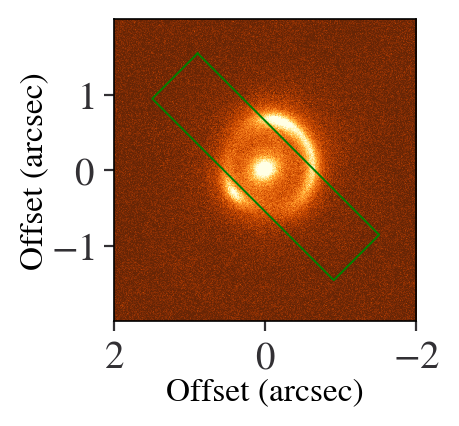

In [59]:
plt.figure(figsize=(2, 2))
myim = im.Image(im_file_loc[1])
#myim.display()
myim.display(imcent=None, imsize=4, fmax=18)
myim.mark_fov(ra=coordinates[1][0]+0.00045, dec=coordinates[1][1]-0.00027,  size=[.85, 3.4], pa=PA[1], lw=0.7)
#myim.plot_circle(ra=coordinates[1][0], dec=coordinates[1][1], radius=1.0)


Loading file ../Target_image_file/PSJ0147+4630_F814W_drc_sci.fits
-----------------------------------------------
Pixel scale (x, y): (  0.040,   0.040) arcsec/pix
Instrument FOV (arcsec):   181.0 x   171.1
Image position angle (E of N):   -0.00
in display, going to set_subim True
in set_subim, going to poststamp_radec True
in poststamp_radec, going to cutout_radec True
in cutout_radec True
------------------
 Requested center (RA, dec):  26.7923825    +46.511886
 Requested center (RA, dec):  01 47 10.172 +46 30 42.79
 Requested center (x, y):      3291.27  2135.38
 Requested image size (arcsec):   8.00   8.00
 Requested size in input pixels: 200 200
 ------------------
 Image PA is effectively zero, so doing pixel-based cutout
   Cutout data in section [xrange,yrange]:  [3191:3391,2035:2235]
   Cutout image center (x, y): (3291, 2135)
   Cutout image size (x y): 200x200

Calculating display limits
--------------------------
 Clipped mean: 0.015541
 Clipped rms:  0.013514
 fmin (mean 

([], [])

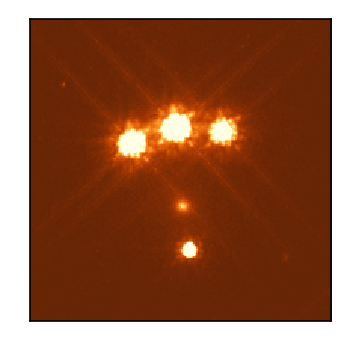

In [88]:
plt.figure(figsize=(2, 2))
myim = im.Image(im_file_loc[2])
#myim.display()
myim.display(imcent=(coordinates[2][0], coordinates[2][1]+0.0002), imsize=8, fmax=80,
             axlabel=False, verbose=True)#imsize=150,
myim.mark_fov(ra=coordinates[2][0]-0.01, dec=coordinates[2][1]-0.02,  size=[1.0, 5.0], pa=PA[2],
             lw=0.7)
plt.xticks([])
plt.yticks([])
#plt.plot([2.5, 1.5], [-2.0, -2.0], '-', data=None, color='g', lw=0.7)
#plt.arrow(-2.9, 2, 0.7, 0, color='g', head_width= 0.1, width=0.003)
#plt.arrow(-2.9, 2, 0, 0.7, color='g', head_width= 0.1, width=0.003)
#plt.text(-1.9, 2.1, 'E', fontsize=6, color='g')
#plt.text(-2.5, 2.7, 'N', fontsize=6, color='g')
#plt.text(2.5, -2.3, '1 arcsec', fontsize=6, color='g')
#plt.savefig('paper_plots/fig1.pdf', format='pdf', dpi=200, bbox_inches='tight')

In [41]:
myim.dispim.

(202, 202)


Loading file ../Target_image_file/J0818-2613/idxo14020_drc.fits
-----------------------------------------------
Pixel scale (x, y): (  0.040,   0.040) arcsec/pix
Instrument FOV (arcsec):   163.6 x   173.9
Image position angle (E of N): -109.30
in display, going to set_subim False
in set_subim, going to poststamp_radec False
in poststamp_radec, going to cutout_radec False
in cutout_radec False

Calculating display limits
--------------------------
 Clipped mean: 0.005314
 Clipped rms:  0.007395
 fmin (mean -   1 sigma):  -0.002081
 fmax (mean +  60 sigma):  0.449011


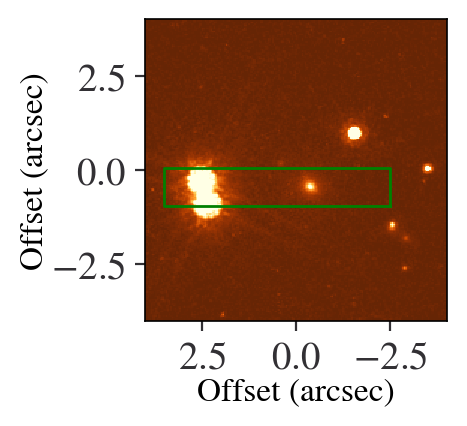

In [95]:
plt.figure(figsize=(2, 2))
myim = im.Image(im_file_loc[3], hext=1)#im_file_loc[3]
#myim.display(verbose=True, debug=True, fixnans=True)
myim.display(imcent=(coordinates[3][0]+0.00015, coordinates[3][1]+0.00025), imsize=8,
             fmax=60, fixnans=True)
myim.mark_fov(ra=coordinates[3][0]+0.0003, dec=coordinates[3][1]+0.00013,  size=[1.0, 6.0], pa=PA[3])


Loading file ../Target_image_file/0924_nirc2n_sharp_Kp.fits
-----------------------------------------------
Pixel scale (x, y): (  0.010,   0.010) arcsec/pix
Instrument FOV (arcsec):    15.2 x    15.2
Image position angle (E of N):   -0.00
in display, going to set_subim False
in set_subim, going to poststamp_radec False
in poststamp_radec, going to cutout_radec False
in cutout_radec False

Calculating display limits
--------------------------
 Clipped mean: 0.019137
 Clipped rms:  0.083360
 fmin (mean -   1 sigma):  -0.064223
 fmax (mean +  20 sigma):  1.686338


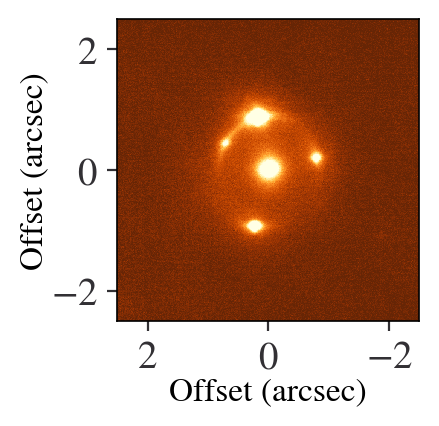

In [97]:
plt.figure(figsize=(2, 2))
myim = im.Image(im_file_loc[4])
#myim.display()
myim.display(imcent=(coordinates[4][0], coordinates[4][1]),  imsize=5, fmax=20)
myim.mark_fov(ra=coordinates[4][0], dec=coordinates[4][1],  size=[1.0, 5.0], pa=PA[4])


Loading file ../Target_image_file/J1433+6007/idgc07010_drc.fits
-----------------------------------------------
Pixel scale (x, y): (  0.040,   0.040) arcsec/pix
Instrument FOV (arcsec):   163.6 x   173.9
Image position angle (E of N):  -42.34



Text(2.7, -2.8, '$1^{\\prime \\prime }$')

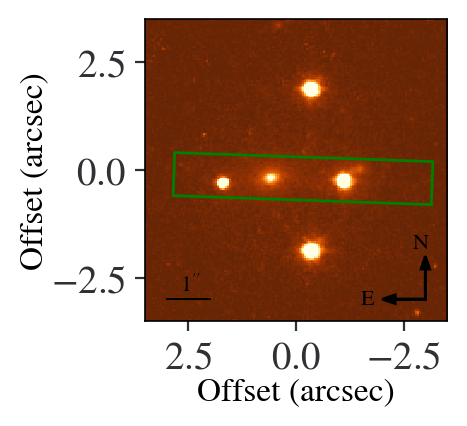

In [77]:
plt.figure(figsize=(2, 2))
myim = im.Image(im_file_loc[5], hext=1)
#myim.display(fixnans=True)
myim.display(imcent=(coordinates[5][0]+0.0002, coordinates[5][1]-0.0001),  imsize=7, fmax=50, fixnans=True)
myim.mark_fov(ra=coordinates[5][0]+0.0001, dec=coordinates[5][1]-0.00015,  size=[1.0, 6.0], pa=PA[5])
plt.plot([im_size[5]/2-0.5, im_size[5]/2-1.5], [-im_size[5]/2+0.5, -im_size[5]/2+0.5],
         '-', data=None, color='k', lw=0.7)
plt.arrow(-im_size[5]/2+0.5, -im_size[5]/2+0.5, 0.7, 0, color='k', head_width= 0.2, width=0.003)
plt.arrow(-im_size[5]/2+0.5, -im_size[5]/2+0.5, 0, 0.7, color='k', head_width= 0.2, width=0.003)
plt.text(-im_size[5]/2 + 2.0, -im_size[5]/2+0.4, 'E', fontsize=8, color='k')
plt.text(-im_size[5]/2 + 0.8, -im_size[5]/2+1.7, 'N', fontsize=8, color='k')
plt.text(im_size[5]/2-.8, -im_size[5]/2+0.7, r'$1^{\prime \prime }$', fontsize=8, color='k')


Loading file ../Target_image_file/J1817+2729/idxo16020_drc.fits
-----------------------------------------------
Pixel scale (x, y): (  0.040,   0.040) arcsec/pix
Instrument FOV (arcsec):   163.5 x   173.9
Image position angle (E of N):  +48.00
------------------
 Requested center (RA, dec): 274.3783333    +27.494617
 Requested center (RA, dec):  18 17 30.800 +27 29 40.62
 Requested center (x, y):      2049.90  1141.51
 Requested image size (arcsec):   8.00   8.00
 Requested size in input pixels: 202 202

Calculating display limits
--------------------------
 Clipped mean: 0.002349
 Clipped rms:  0.005637
 fmin (mean -   1 sigma):  -0.003287
 fmax (mean +  60 sigma):  0.340545


Text(3.2, -3.3, '$1^{\\prime \\prime }$')

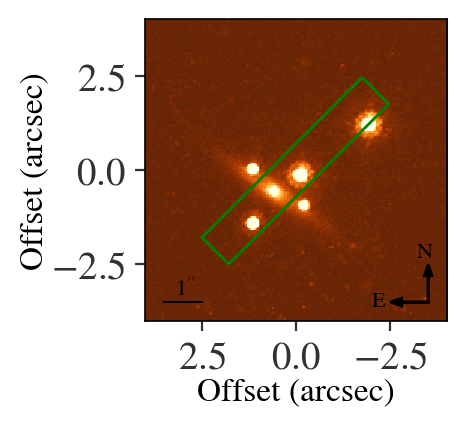

In [75]:
plt.figure(figsize=(2, 2))
myim = im.Image(im_file_loc[6], hext=1)
#myim.display(fixnans=True)
myim.display(imcent=(coordinates[6][0]+0.0005, coordinates[6][1]-0.0008),  imsize=8, fmax=60,
             fixnans=True, verbose=True)
myim.mark_fov(ra=coordinates[6][0]+0.0005, dec=coordinates[6][1]-0.0008,  size=[1.0, 6.0], pa=PA[6])
plt.plot([im_size[6]/2-0.5, im_size[6]/2-1.5], [-im_size[6]/2+0.5, -im_size[6]/2+0.5],
         '-', data=None, color='k', lw=0.7)
plt.arrow(-im_size[6]/2+0.5, -im_size[6]/2+0.5, 0.7, 0, color='k', head_width= 0.2, width=0.003)
plt.arrow(-im_size[6]/2+0.5, -im_size[6]/2+0.5, 0, 0.7, color='k', head_width= 0.2, width=0.003)
plt.text(-im_size[6]/2 + 2.0, -im_size[6]/2+0.4, 'E', fontsize=8, color='k')
plt.text(-im_size[6]/2 + 0.8, -im_size[6]/2+1.7, 'N', fontsize=8, color='k')
plt.text(im_size[6]/2-.8, -im_size[6]/2+0.7, r'$1^{\prime \prime }$', fontsize=8, color='k')

In [38]:
myim.plthdu.shape

AttributeError: 'Image' object has no attribute 'plthdu'


Cutout image center (x, y): (2000, 58)
Cutout image size (x y): 80x80

Calculating display limits
--------------------------
 Clipped mean: 25.197567
 Clipped rms:  44.633427
 fmin (mean -   1 sigma):  -19.435860
 fmax (mean +  40 sigma):  1810.534660


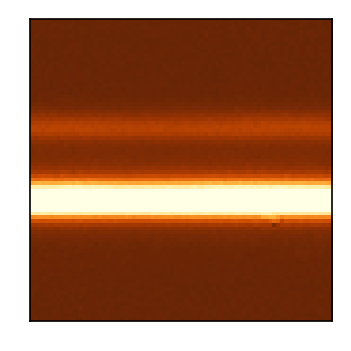

In [413]:
plt.figure(figsize=(2.2, 2.0))
spec3.display(axlabel=False, mode='xy', imcent=(2000, spec3.data.shape[0]//2), imsize=(80, 80), fmax=40)
plt.xticks([])
plt.yticks([])
plt.savefig('paper_plots/fig2.pdf', format='pdf', dpi=200, bbox_inches='tight')

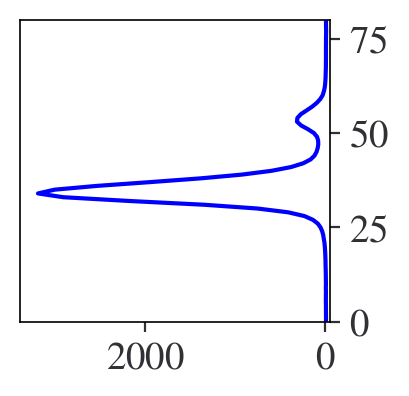

In [427]:
fg = plt.figure(figsize=(2, 2))
ax = fg.gca()
pf = spec3.spatial_profile(pixrange=[1500, 1800], fig=fg, title=None, doplot=False, verbose=False)
ax.plot(pf['flux'], pf['wav']-15, color='b' )
ax.set_xlim(np.max(pf['flux']+200), -50)
ax.set_ylim(0, 80)
ax.yaxis.set_ticks_position('right')
ax.yaxis.set_ticks(np.arange(0, 80, 25))
plt.show()
#plt.savefig('paper_plots/fig3.pdf', format='pdf', dpi=200, bbox_inches='tight')

In [3]:
RA_DEC = [['04:48:22.0541', '+12:27:55.757'], ['06:35:12.3498', '51:57:01.306'], ['01:47:10.1718', '+46:30:42.071'],
          ['08:18:28.24', '-26:13:24.8'], ['09:24:55.8189', '+2:19:24.5'], ['14:33:22.80', '+60:7:15.6'],
          ['18:17:30.68', '+27:29:43.5']]
#[72.091625, 12.46547], [98.800833, 51.95041]
PA = [-23, 225, 7.3, 90, 10, 88, 315]

In [4]:
coordinates = []
for co in RA_DEC:
    cord = SkyCoord(co[0], co[1], unit=(u.hourangle, u.deg))
    coordinates.append([cord.ra.deg, cord.dec.deg])
    #dec = Angle(co[1], unit=u.deg)
    print(co[0], ':', cord.ra.deg,'\t', co[1], ':', cord.dec.deg)
    #print(dec, ':', dec.deg)

04:48:22.0541 : 72.09189208333332 	 +12:27:55.757 : 12.465488055555555
06:35:12.3498 : 98.80145749999998 	 51:57:01.306 : 51.950362777777784
01:47:10.1718 : 26.792382499999995 	 +46:30:42.071 : 46.51168638888889
08:18:28.24 : 124.61766666666666 	 -26:13:24.8 : -26.223555555555553
09:24:55.8189 : 141.23257875 	 +2:19:24.5 : 2.323472222222222
14:33:22.80 : 218.345 	 +60:7:15.6 : 60.121
18:17:30.68 : 274.37783333333334 	 +27:29:43.5 : 27.495416666666667


In [5]:
im_hext = [0, 0, 0, 1, 0, 1, 1]
im_cent = [None, None, 'coord', 'coord', 'coord', 'coord', 'coord']
imcent_offest = [None,  None, [0.0, 0.0002], [0.00015, 0.00025], [0,0], [0.0002, -0.0001],
                 [0.0005,-0.0008]]
slit_offset = [[0.00025, -0.00025], [0.00045, -0.00027], [0, 0], [0.0003, 0.00013], [0,0],
               [0.0001,-0.00015 ], [0.0005, -0.0008]]
im_size = [4.0, 4.0, 8.0, 8.0, 5.0, 7, 8]
im_fmax = [18, 18, 80, 60, 20, 50, 60]
slit_size = [[0.85, 3.0], [0.85, 3.4], [1.0, 5.0], [1.0, 6.0], [1.0, 5.0], [1.0, 6.0], [1.0, 6.0]]

In [6]:
file_list = ['../spectra_extraction/B0445_LRIS_spectra/B0445_r0031_cleaned.fits',
            '../spectra_extraction/B0631_LRIS_spectra/B0631_r0041_cleaned.fits',
            '../spectra_extraction/J0147_ESI_spectra/J0147_coadd2d_sp_order_9.fits',
            '../spectra_extraction/J0818_ESI_spectra/J0818_coadd2d_sp_order_9.fits',
            '../spectra_extraction/J0924_ESI_spectra/J0924_coadd2d_sp_order_4.fits',
            '../spectra_extraction/J1433_ESI_spectra/J1433_coadd2d_sp_order_6.fits',
            '../spectra_extraction/J1817_ESI_spectra/J1817_coadd2d_sp_order_6.fits']

sp_hext = [0, 1, 0, 0, 0, 0, 0]
disp_axis = ['y', 'y', 'x', 'x', 'x', 'x', 'x']
x_trim = [[55, 160], [40, 120], None, None, None, None, None]
sp_cent = [(3825, 53), None, None, (1770, 58), None, (2000, 47), (2000, 54)]
sp_fmax=[4.0, 4.5, 40, 6, 12, 5, 4]
pix_range = [[1800, 2400], [1800, 2400], [1500, 1800], [1600, 2300], [2400, 2800], [2100, 2500],
             [2700, 3100]]


Loading file ../spectra_extraction/B0445_LRIS_spectra/B0445_r0031_cleaned.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../spectra_extraction/B0445_LRIS_spectra/B0445_r0031_cleaned.fits (HDU=0)
The input dataset was trimmed
 xrange: 55:161.  yrange: 0:4096
Final data dimensions (x y): 106 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 106


Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096


   Cutout data in section [xrange,yrange]:  [2008:2088,13:93]
   Cutout image center (x, y): (2048, 53)
   Cutout image size (x y): 80x80



RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

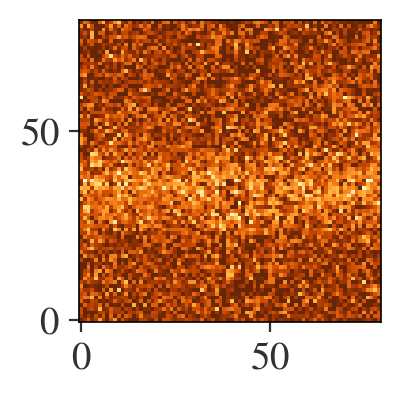

In [98]:
for i in range(len(file_list)):
    #if var_file_list[i] is None:
    fg = plt.figure(figsize=(2, 2))
    spec = spec2d.Spec2d(file_list[i], hext=sp_hext[i], verbose=True, xtrim=x_trim[i]) 
    if spec.dispaxis!=disp_axis[i]:
        spec.set_dispaxis(disp_axis[i])
        spec['org_data'] = im.WcsHDU(spec.data.T, wcsverb=False)
        spec.display(dmode='org_data', axlabel=False, mode='xy', imcent=im_cent[i],
                     imsize=(80, 80), fmax=sp_fmax[i], fig=fg)
    else:
        spec.display(axlabel=False, mode='xy',  imcent=im_cent[i], imsize=(80, 80),
                  fmax=sp_fmax[i], fig=fg)#,  fig=fg, ax=ax2
    plt.colorbar(cax=spec.dispim.ax1)
    plt.show()

In [ ]:
#plt.plot([2.5, 1.5], [-2.0, -2.0], '-', data=None, color='g', lw=0.7)
#plt.arrow(-2.9, 2, 0.7, 0, color='g', head_width= 0.1, width=0.003)
#plt.arrow(-2.9, 2, 0, 0.7, color='g', head_width= 0.1, width=0.003)
#plt.text(-1.9, 2.1, 'E', fontsize=6, color='g')
#plt.text(-2.5, 2.7, 'N', fontsize=6, color='g')
#plt.text(2.5, -2.3, '1 arcsec', fontsize=6, color='g')



Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096


   Cutout data in section [xrange,yrange]:  [3790:3860,18:88]
   Cutout image center (x, y): (3825, 53)
   Cutout image size (x y): 70x70


Found 1 NaNs in the two-dimensional spectrum

Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096


   Cutout data in section [xrange,yrange]:  [2013:2083,6:76]
   Cutout image center (x, y): (2048, 41)
   Cutout image size (x y): 70x70


   Cutout data in section [xrange,yrange]:  [2013:2083,24:94]
   Cutout image center (x, y): (2048, 59)
   Cutout image size (x y): 70x70


   Cutout data in section [xrange,yrange]:  [1735:1805,23:93]
   Cutout image center (x, y): (1770, 58)
   Cutout image size (x y): 70x70


   Cutout data in section [xrange,yrange]:  [2013:2083,36:106]
   Cutout image center (x, y): (2048, 71)
   Cutout image size (x y): 70x70


   Cutout data in section [xrange,yrange]:  [1965:2035,12:

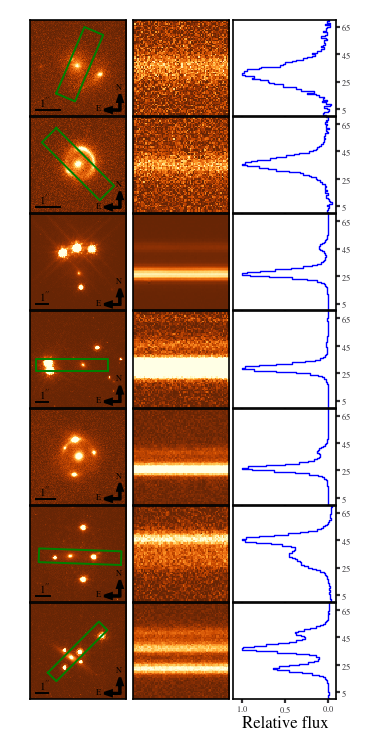

In [8]:
fg = plt.figure(figsize=(2, 4.5))
rows = 7
columns = 3
gs = gridspec.GridSpec(rows, columns, figure=fg)

for i in range(rows):
    ax1 = fg.add_subplot(gs[i, 0])
    myim = im.Image(im_file_loc[i], hext=im_hext[i], verbose=False, wcsverb=False)
    #myim.display()
    if im_cent[i] is None:
        myim.display(imcent=None, imsize=im_size[i], axlabel=False, verbose=False, fig=fg, ax=ax1,
                     fmax=im_fmax[i], fixnans=True)
    else:
        myim.display(imcent=(coordinates[i][0]+imcent_offest[i][0], coordinates[i][1]+imcent_offest[i][1]),
                     imsize=im_size[i], axlabel=False, verbose=False, fig=fg, ax=ax1,
                     fmax=im_fmax[i], fixnans=True)
        
    myim.mark_fov(ra=coordinates[i][0]+slit_offset[i][0], dec=coordinates[i][1]+slit_offset[i][1],
                  size=slit_size[i], pa=PA[i], lw=0.7)
    ax1.set_xticks([])
    ax1.set_yticks([])
    txt_off = 8.0/im_size[i]
    ax1.plot([im_size[i]/2-(0.5/txt_off), im_size[i]/2-(0.5/txt_off)-1.0], 
             [-im_size[i]/2+(0.5/txt_off), -im_size[i]/2+(0.5/txt_off)],
         '-', data=None, color='k', lw=0.7)
    ax1.arrow(-im_size[i]/2+(0.5/txt_off), -im_size[i]/2+(0.5/txt_off), 0.7/txt_off, 0, color='k',
               head_width= 0.4/txt_off, width=0.0001/txt_off)
    ax1.arrow(-im_size[i]/2+(0.5/txt_off), -im_size[i]/2+(0.5/txt_off), 0, 0.7/txt_off, color='k',
              head_width= 0.4/txt_off, width=0.0001/txt_off)
    ax1.text(-im_size[i]/2 + 2.5/txt_off, -im_size[i]/2+0.4/txt_off, 'E', fontsize=3, color='k')
    ax1.text(-im_size[i]/2 + 0.8/txt_off, -im_size[i]/2+2.2/txt_off, 'N', fontsize=3, color='k')
    ax1.text(im_size[i]/2-.8/txt_off, -im_size[i]/2+0.7/txt_off, r'$1^{\prime \prime }$',
             fontsize=4, color='k')

    ax2 = fg.add_subplot(gs[i, 1])
    spec = spec2d.Spec2d(file_list[i], hext=sp_hext[i], verbose=False, xtrim=x_trim[i]) 
    if spec.dispaxis!=disp_axis[i]:
        spec.set_dispaxis(disp_axis[i])
        spec['org_data'] = im.WcsHDU(spec.data.T, wcsverb=False, verbose=False)
        spec.display(dmode='org_data', axlabel=False, mode='xy', imcent=sp_cent[i],
                     imsize=(70, 70), fmax=sp_fmax[i], fig=fg, ax=ax2, verbose=False)
    else:
        spec.display(axlabel=False, mode='xy', imcent=sp_cent[i], imsize=(70, 70),
                  fmax=sp_fmax[i], fig=fg, ax=ax2)

    ax2.set_yticks([])
    ax2.set_xticks([])

    ax3 = fg.add_subplot(gs[i, 2])
    pf = spec.spatial_profile(pixrange=pix_range[i], title=None, doplot=False, verbose=False)
    if sp_cent[i] is None:
        if spec.dispaxis=='y':
            wav_offset = spec.data.shape[1]//2 - 35
        else:
            wav_offset = spec.data.shape[0]//2 - 35
    else:
        wav_offset = sp_cent[i][1] - 35
    #print(wav_offset)
    ax3.plot(pf['flux']/np.max(pf['flux']), pf['wav']-wav_offset, color='b', linestyle='solid',
             drawstyle = 'steps', lw=0.5)
    #ax3.plot(np.arange(0,50)**2, np.arange(0, 50))
    #print(np.min(pf['flux']))
    #ax3.set_xlim(1.05*np.max(pf['flux']), np.min(pf['flux'])-np.max(pf['flux'])/20)
    ax3.set_xlim(1.1, -0.1)
    ax3.set_ylim(0, 70)
    ax3.yaxis.set_ticks_position('right')
    ax3.yaxis.set_ticks(np.arange(5, 70, 20))
    ax3.tick_params(axis='both', labelsize=3, length=1.5, pad=0.05)
    
    if i==rows-1:
        ax3.set_xlabel('Relative flux', fontsize=6)

    #fg.tight_layout()
    plt.subplots_adjust(wspace=0.005, hspace=0.01)
plt.savefig('paper_plots/fig1.pdf', format='pdf', dpi=150, bbox_inches='tight')

## Another plot

In [10]:
file_list = ['../spectra_extraction/B0445_LRIS_spectra/B0445_r0030_cleaned.fits',
            '../spectra_extraction/B0631_LRIS_spectra/B0631_r0041_cleaned.fits',
            '../spectra_extraction/J0147_ESI_spectra/J0147_coadd2d_sp_order_9.fits',
            '../spectra_extraction/J0818_ESI_spectra/J0818_coadd2d_sp_order_9.fits',
            '../spectra_extraction/J0924_ESI_spectra/J0924_coadd2d_sp_order_4.fits',
            '../spectra_extraction/J1433_ESI_spectra/J1433_coadd2d_sp_order_6.fits',
            '../spectra_extraction/J1817_ESI_spectra/J1817_coadd2d_sp_order_6.fits']

## First create the models


Loading file ../spectra_extraction/B0445_LRIS_spectra/B0445_r0030_cleaned.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../spectra_extraction/B0445_LRIS_spectra/B0445_r0030_cleaned.fits (HDU=0)
The input dataset was trimmed
 xrange: 60:141.  yrange: 0:4096
Final data dimensions (x y): 81 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 81


Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096


Dispersion : 0.800000
Found 130 NaNs in the two-dimensional spectrum

sky subtracted and cosmic ray rejected data has been resampled along with vardata in place of the coordinateds whcih rectify the tilted wave image
Profile max value (before normalization) 24.566525


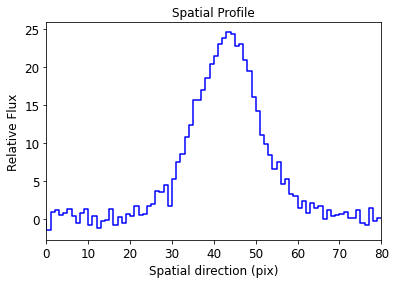


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.


KeyboardInterrupt: Interrupted by user

In [12]:
spec1 = spec2d.Spec2d(file_list[0], hext=0, varext=1, xtrim=[60, 140])

spec1.set_dispaxis('y')
#plt.show()
spec1.do_waverect(doplot=False, resamp_ord=1, wavext=3)
spec1.spatial_profile(pixrange=[1700, 2400])
plt.show()
mod1 = spec1.initial_model()


Loading file ../spectra_extraction/J0147_ESI_spectra/J0147_coadd2d_sp_order_9.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../spectra_extraction/J0147_ESI_spectra/J0147_coadd2d_sp_order_9.fits (HDU=0)
Final data dimensions (x y): 4096 x 117

Dispersion axis:              x
N_pixels along dispersion axis: 4096

Profile max value (before normalization) 3192.872032


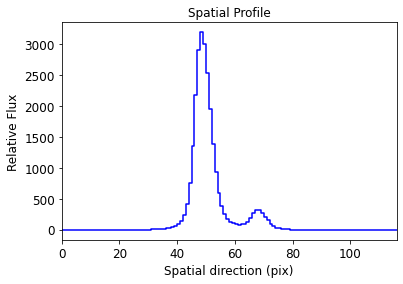


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 3

Now enter constants of the background polynomial upto degree 0
c0 : 5

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 3190, 49.5, 3, 4

amplitude=3190.000000, x_0=49.500000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 150, 55, 2, 3

amplitude=150.000000, x_0=55.000000, gamma=2.000000, alpha=3.000000

Parameters of Moffat profile 3 : 350, 69, 3, 4

amplitude=350.000000, x_0=69.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-8.01215279)>

    [1]: <Moffat1D(amplitu

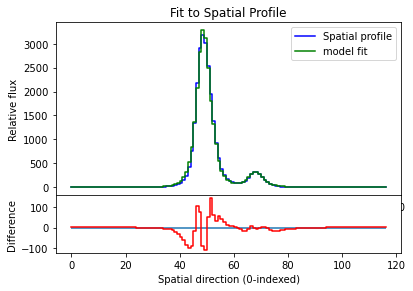

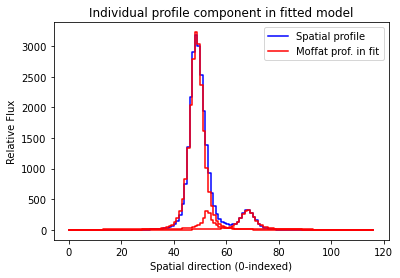


Do you want to start over ? : type yes/no
no


<CompoundModel(c0_0=-8.01215279, amplitude_1=3246.11783715, x_0_1=49.20957891, gamma_1=4.75366424, alpha_1=2.35940973, amplitude_2=324.27835351, x_0_2=53.34570386, gamma_2=1.27903943, alpha_2=0.6973154, amplitude_3=323.30624279, x_0_3=68.60925797, gamma_3=3.82181279, alpha_3=1.38984459)>

In [13]:
# J0147
spec3 = spec2d.Spec2d(file_list[2])
spec3.spatial_profile(pixrange=[1500, 1800])
plt.show()
spec3.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-8.01215279)>

    [1]: <Moffat1D(amplitude=3246.11783715, x_0=49.20957891, gamma=4.75366424, alpha=2.35940973)>

    [2]: <Moffat1D(amplitude=324.27835351, x_0=53.34570386, gamma=1.27903943, alpha=0.6973154)>

    [3]: <Moffat1D(amplitude=323.30624279, x_0=68.60925797, gamma=3.82181279, alpha=1.38984459)>
Parameters:
           c0_0           amplitude_1    ...      gamma_3            alpha_3     
    ------------------ ----------------- ... ------------------ -----------------
    -8.012152792854916 3246.117837152338 ... 3.8218127887706217 1.389844590481605

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-2.22247979)>

    [1]: <Moffat1D(ampli

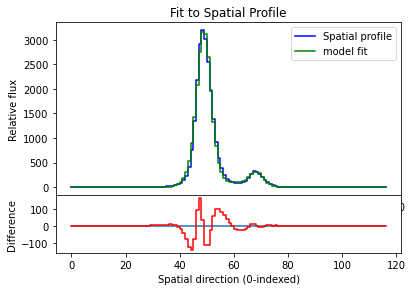

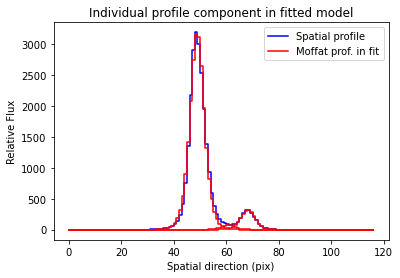

In [14]:
def tie_pos1_moffat_9(model):
    return model.x_0_1 + (1.95 / pixscale[0]) #(0.886 / pixscale)

def tie_pos2_moffat_9(model):
    return model.x_0_1 + (3.15 / pixscale[0])

def tie_gamma_moffat(model):
    return model.gamma_3

def tie_alpha_moffat(model):
    return model.alpha_3

func_dict = {'9_1' : tie_pos1_moffat_9, '9_2' : tie_pos2_moffat_9}

pixscale = [0.163]
ord_list = [9]

spec3.mod0[2].x_0.tied = func_dict['%d_%d' %(ord_list[0], 1)] #tie_pos1_moffat
spec3.mod0[3].x_0.tied = func_dict['%d_%d' %(ord_list[0], 2)] #tie_pos2_moffat
spec3.mod0[1].gamma.tied = tie_gamma_moffat
spec3.mod0[1].alpha.tied = tie_alpha_moffat
spec3.mod0[2].gamma.tied = tie_gamma_moffat
spec3.mod0[2].alpha.tied = tie_alpha_moffat
mod3 = spec3.refined_model(spec3.mod0)


Loading file ../spectra_extraction/J0818_ESI_spectra/J0818_coadd2d_sp_order_9.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../spectra_extraction/J0818_ESI_spectra/J0818_coadd2d_sp_order_9.fits (HDU=0)
Final data dimensions (x y): 4096 x 116

Dispersion axis:              x
N_pixels along dispersion axis: 4096

Profile max value (before normalization) 916.726422


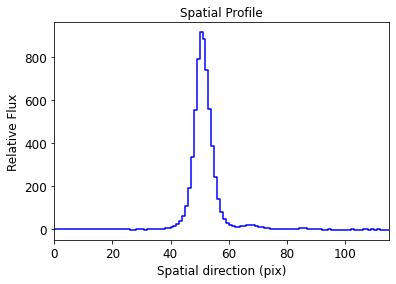


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : 1

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 900, 50.5, 3, 4

amplitude=900.000000, x_0=50.500000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 30, 67.7, 2, 3

amplitude=30.000000, x_0=67.700000, gamma=2.000000, alpha=3.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-3.57632918)>

    [1]: <Moffat1D(amplitude=922.19780996, x_0=51.51752723, gamma=6.77154212, alpha=3.95228274)>

    [2]: <Moffat1D(amplitude=18.41894379, x_0=67.3047

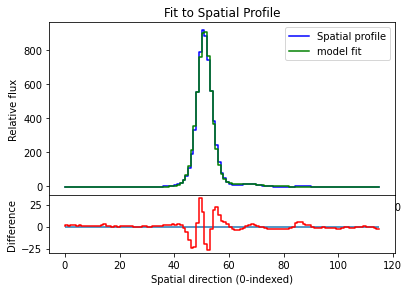

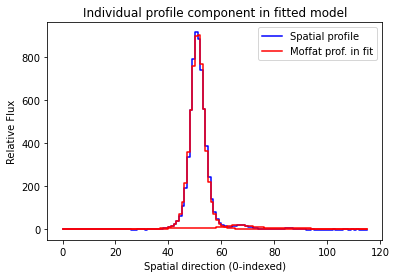


Do you want to start over ? : type yes/no
no


<CompoundModel(c0_0=-3.57632918, amplitude_1=922.19780996, x_0_1=51.51752723, gamma_1=6.77154212, alpha_1=3.95228274, amplitude_2=18.41894379, x_0_2=67.30479141, gamma_2=-4.7216966, alpha_2=0.70020806)>

In [15]:
#J0818
spec4 = spec2d.Spec2d(file_list[3])
spec4.spatial_profile(pixrange=[1600, 2300])
plt.show()
spec4.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-3.57632918)>

    [1]: <Moffat1D(amplitude=922.19780996, x_0=51.51752723, gamma=6.77154212, alpha=3.95228274)>

    [2]: <Moffat1D(amplitude=18.41894379, x_0=67.30479141, gamma=-4.7216966, alpha=0.70020806)>
Parameters:
            c0_0           amplitude_1    ...      gamma_2            alpha_2      
    ------------------- ----------------- ... ------------------ ------------------
    -3.5763291765211025 922.1978099585783 ... -4.721696601807611 0.7002080627928065

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-1.81245155)>

    [1]: <Moffat1D(amplitude=924.7371361, x_0=51.52283211, gamma=6.40922941, alpha=3.58384287)>

    [2]: <Moffat1D(amplitude=22.

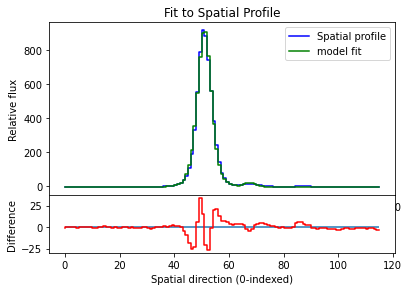

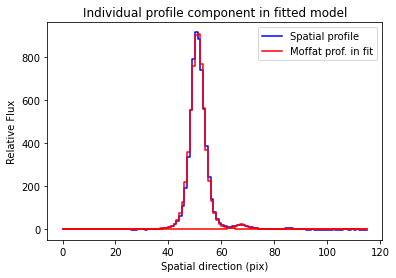

In [19]:
def tie_pos1_moffat_9(model):
    return model.x_0_1 + (2.7  /  pixscale[0])  

def tie_gamma_moffat1(model):
    return model.gamma_1 * 0.5

def tie_alpha_moffat1(model):
    return model.alpha_1 * 0.5

func_dict = {'9_1' : tie_pos1_moffat_9}

pixscale = [0.163]
ord_list = [9]

spec4.mod0[2].x_0.tied = func_dict['%d_%d' %(ord_list[0], 1)] #tie_pos1_moffat
#spec3.mod0[3].x_0.tied = func_dict['%d_%d' %(ord_list[0], 2)] #tie_pos2_moffat
#spec3.mod0[1].gamma.tied = tie_gamma_moffat
#spec3.mod0[1].alpha.tied = tie_alpha_moffat
spec4.mod0[2].gamma.tied = tie_gamma_moffat1
spec4.mod0[2].alpha.tied = tie_alpha_moffat1
mod4 = spec4.refined_model(spec4.mod0)


Loading file ../spectra_extraction/J0924_ESI_spectra/J0924_coadd2d_sp_order_4.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../spectra_extraction/J0924_ESI_spectra/J0924_coadd2d_sp_order_4.fits (HDU=0)
Final data dimensions (x y): 4096 x 141

Dispersion axis:              x
N_pixels along dispersion axis: 4096

Profile max value (before normalization) 255.529413


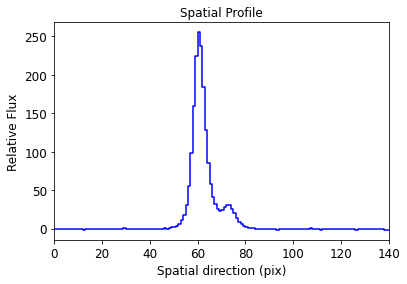


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 3

Now enter constants of the background polynomial upto degree 0
c0 : 2

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 260, 61, 3, 4

amplitude=260.000000, x_0=61.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 25, 67.5, 2,3

amplitude=25.000000, x_0=67.500000, gamma=2.000000, alpha=3.000000

Parameters of Moffat profile 3 : 40, 74, 3, 4

amplitude=40.000000, x_0=74.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-0.45707963)>

    [1]: <Moffat1D(amplitude=247.

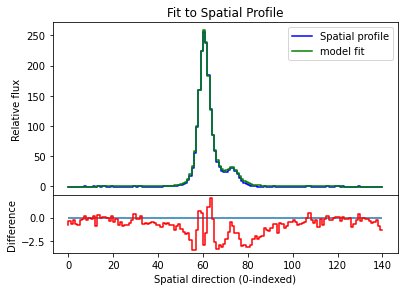

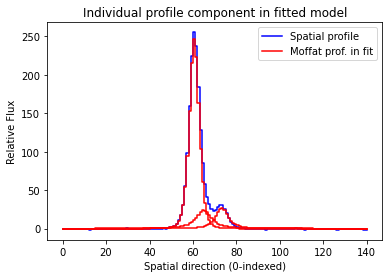


Do you want to start over ? : type yes/no
no


<CompoundModel(c0_0=-0.45707963, amplitude_1=247.053305, x_0_1=61.08800256, gamma_1=4.76488875, alpha_1=2.74790276, amplitude_2=23.84398878, x_0_2=65.47265807, gamma_2=4.75465007, alpha_2=1.2196162, amplitude_3=27.1048839, x_0_3=73.81634725, gamma_3=4.06785433, alpha_3=1.33531375)>

In [20]:
#J0924
spec5 = spec2d.Spec2d(file_list[4])
spec5.spatial_profile(pixrange=[2400, 2800])
plt.show()
spec5.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-0.45707963)>

    [1]: <Moffat1D(amplitude=247.053305, x_0=61.08800256, gamma=4.76488875, alpha=2.74790276)>

    [2]: <Moffat1D(amplitude=23.84398878, x_0=65.47265807, gamma=4.75465007, alpha=1.2196162)>

    [3]: <Moffat1D(amplitude=27.1048839, x_0=73.81634725, gamma=4.06785433, alpha=1.33531375)>
Parameters:
           c0_0           amplitude_1     ...     gamma_3           alpha_3     
    ------------------ ------------------ ... ---------------- -----------------
    -0.457079629095719 247.05330500177257 ... 4.06785433189884 1.335313754457228

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-0.55974938)>

    [1]: <Moffat1D(amplitude=255.

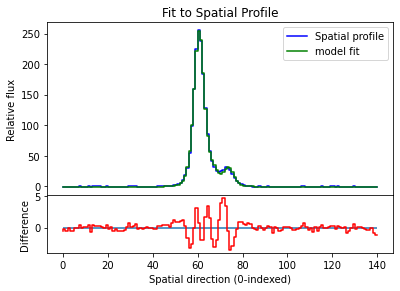

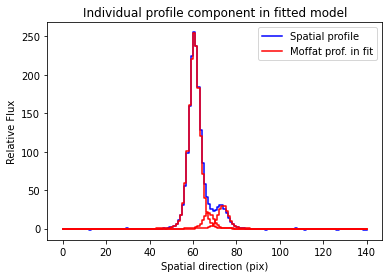

In [23]:
def tie_pos1_moffat_4(model):
    return model.x_0_1 + (0.89 / pixscale[0]) #(0.896 / pixscale) 

def tie_pos2_moffat_4(model):
    return model.x_0_1 + (1.81 / pixscale[0])  #(1.87 / pixscale) 

def tie_gamma_moffat(model):
    return model.gamma_1

def tie_alpha_moffat(model):
    return model.alpha_1

func_dict = {'4_1' : tie_pos1_moffat_4, '4_2' : tie_pos2_moffat_4}

pixscale = [0.137]
order_list = [4]


spec5.mod0[2].x_0.tied = func_dict['%d_%d' %(order_list[0], 1)] #tie_pos1_moffat
spec5.mod0[3].x_0.tied = func_dict['%d_%d' %(order_list[0], 2)] #tie_pos2_moffat
spec5.mod0[2].gamma.tied = tie_gamma_moffat
spec5.mod0[2].alpha.tied = tie_alpha_moffat
spec5.mod0[3].gamma.tied = tie_gamma_moffat
spec5.mod0[3].alpha.tied = tie_alpha_moffat
mod5 = spec5.refined_model(spec5.mod0)


Loading file ../spectra_extraction/J1433_ESI_spectra/J1433_coadd2d_sp_order_6.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../spectra_extraction/J1433_ESI_spectra/J1433_coadd2d_sp_order_6.fits (HDU=0)
Final data dimensions (x y): 4096 x 128

Dispersion axis:              x
N_pixels along dispersion axis: 4096

Profile max value (before normalization) 42.212142


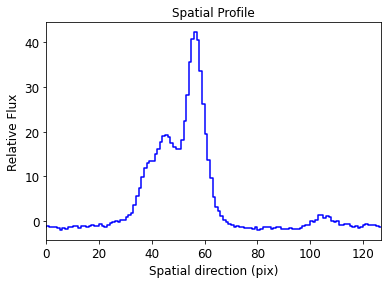


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 3

Now enter constants of the background polynomial upto degree 0
c0 : -1

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 42, 57, 3, 4

amplitude=42.000000, x_0=57.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 20, 46, 2, 3

amplitude=20.000000, x_0=46.000000, gamma=2.000000, alpha=3.000000

Parameters of Moffat profile 3 : 13, 38.2, 3, 4

amplitude=13.000000, x_0=38.200000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-1.01568101)>

    [1]: <Moffat1D(amplitude=42.5

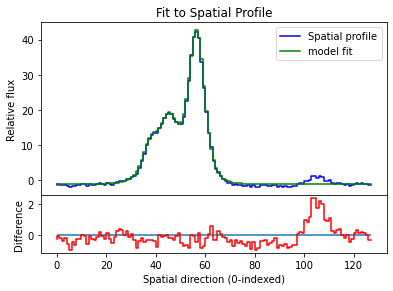

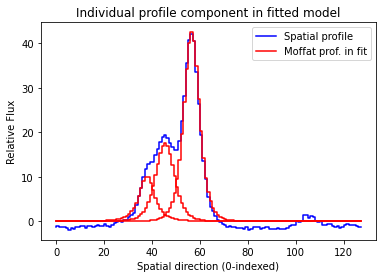


Do you want to start over ? : type yes/no
no


In [25]:
#J1433
spec6 = spec2d.Spec2d(file_list[5])
spec6.spatial_profile(pixrange=[2100, 2500])
plt.show()
mod6 = spec6.initial_model()


Loading file ../spectra_extraction/J1817_ESI_spectra/J1817_coadd2d_sp_order_6.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../spectra_extraction/J1817_ESI_spectra/J1817_coadd2d_sp_order_6.fits (HDU=0)
Final data dimensions (x y): 4096 x 128

Dispersion axis:              x
N_pixels along dispersion axis: 4096

Profile max value (before normalization) 215.742750


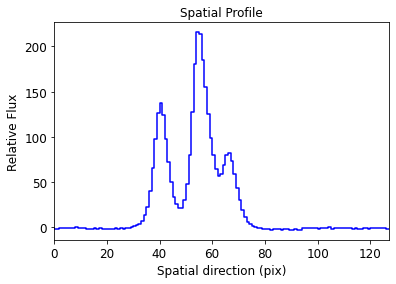


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 5

Now enter constants of the background polynomial upto degree 0
c0 : 0.5

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 145, 41, 3, 4

amplitude=145.000000, x_0=41.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 215, 56, 3, 4

amplitude=215.000000, x_0=56.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 3 : 100, 59.4, 3,4

amplitude=100.000000, x_0=59.400000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 4 :  30, 61, 2, 3

amplitude=30.000000, x_0=61.000000, gamma=2.000000, alpha=3.000000

Parameters of Moffat profile 5 : 70, 68, 3, 4

amplitude=70.000000, x_0=68.000000, gamma=3.000000, 

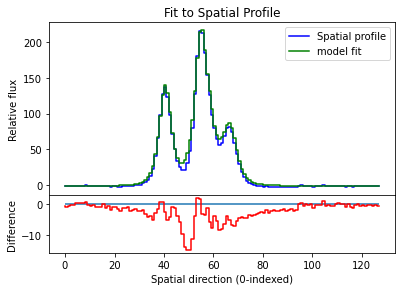

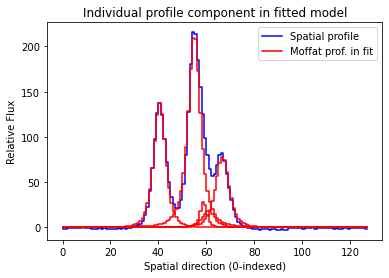


Do you want to start over ? : type yes/no
no


In [27]:
#J1817
spec7 = spec2d.Spec2d(file_list[6])
spec7.spatial_profile(pixrange=[2700, 3100])
plt.show()
mod6 = spec7.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3] + [4] + [5]
Components: 
    [0]: <Polynomial1D(0, c0=-0.84981571)>

    [1]: <Moffat1D(amplitude=137.03696265, x_0=41.02808957, gamma=4.92265329, alpha=2.28916097)>

    [2]: <Moffat1D(amplitude=213.63771481, x_0=55.47711342, gamma=4.03641825, alpha=1.58898712)>

    [3]: <Moffat1D(amplitude=28.8298556, x_0=59.28767599, gamma=3.0438227, alpha=2.76350367)>

    [4]: <Moffat1D(amplitude=17.99073705, x_0=61.48664863, gamma=5.15528456, alpha=2.31668329)>

    [5]: <Moffat1D(amplitude=78.30642131, x_0=67.14297915, gamma=5.44639726, alpha=2.20184338)>
Parameters:
           c0_0           amplitude_1    ...     gamma_5          alpha_5     
    ------------------ ----------------- ... --------------- -----------------
    -0.849815709069961 137.0369626534084 ... 5.4463972617888 2.201843380811082

-------------------------------------------


Fitted model
-----

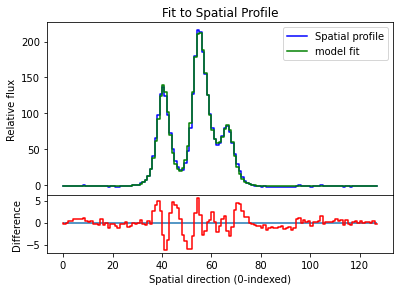

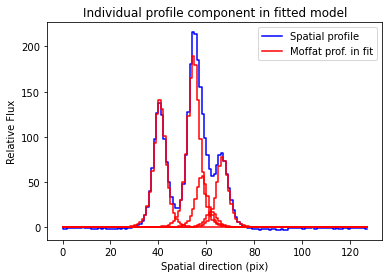

In [28]:
def tie_pos1_moffat_6(model):
    return model.x_0_2 - (2.10 / pixscale[0])  

def tie_pos2_moffat_6(model):
    return model.x_0_2 + (1.1 / pixscale[0])

def tie_pos3_moffat_6(model):
    return model.x_0_2 + (1.79 / pixscale[0])

def tie_pos4_moffat_6(model):
    return model.x_0_2 + (0.51 / pixscale[0])

def tie_gamma_moffat(model):
    return model.gamma_2

def tie_alpha_moffat(model):
    return model.alpha_2 

func_dict = {
'6_1' : tie_pos1_moffat_6, '6_2' : tie_pos2_moffat_6, '6_3' : tie_pos3_moffat_6, '6_4' : tie_pos4_moffat_6}

pixscale = [0.149]
ord_list = [ 6]

spec7.mod0[1].x_0.tied = func_dict['%d_%d' %(ord_list[0], 1)] #tie_pos1_moffat
#spec7.mod0[1].mean.tied = func_dict['%d_%d' %(ord_list[i], 2)] #tie_pos1_moffat
spec7.mod0[3].x_0.tied = func_dict['%d_%d' %(ord_list[0], 4)] #tie_pos2_moffat
spec7.mod0[4].x_0.tied = func_dict['%d_%d' %(ord_list[0], 2)]
spec7.mod0[5].x_0.tied = func_dict['%d_%d' %(ord_list[0], 3)]
spec7.mod0[1].gamma.tied = tie_gamma_moffat
spec7.mod0[1].alpha.tied = tie_alpha_moffat
spec7.mod0[3].gamma.tied = tie_gamma_moffat
spec7.mod0[3].alpha.tied = tie_alpha_moffat
spec7.mod0[4].gamma.tied = tie_gamma_moffat
spec7.mod0[4].alpha.tied = tie_alpha_moffat
spec7.mod0[5].gamma.tied = tie_gamma_moffat
spec7.mod0[5].alpha.tied = tie_alpha_moffat
mod7 = spec7.refined_model(spec7.mod0)

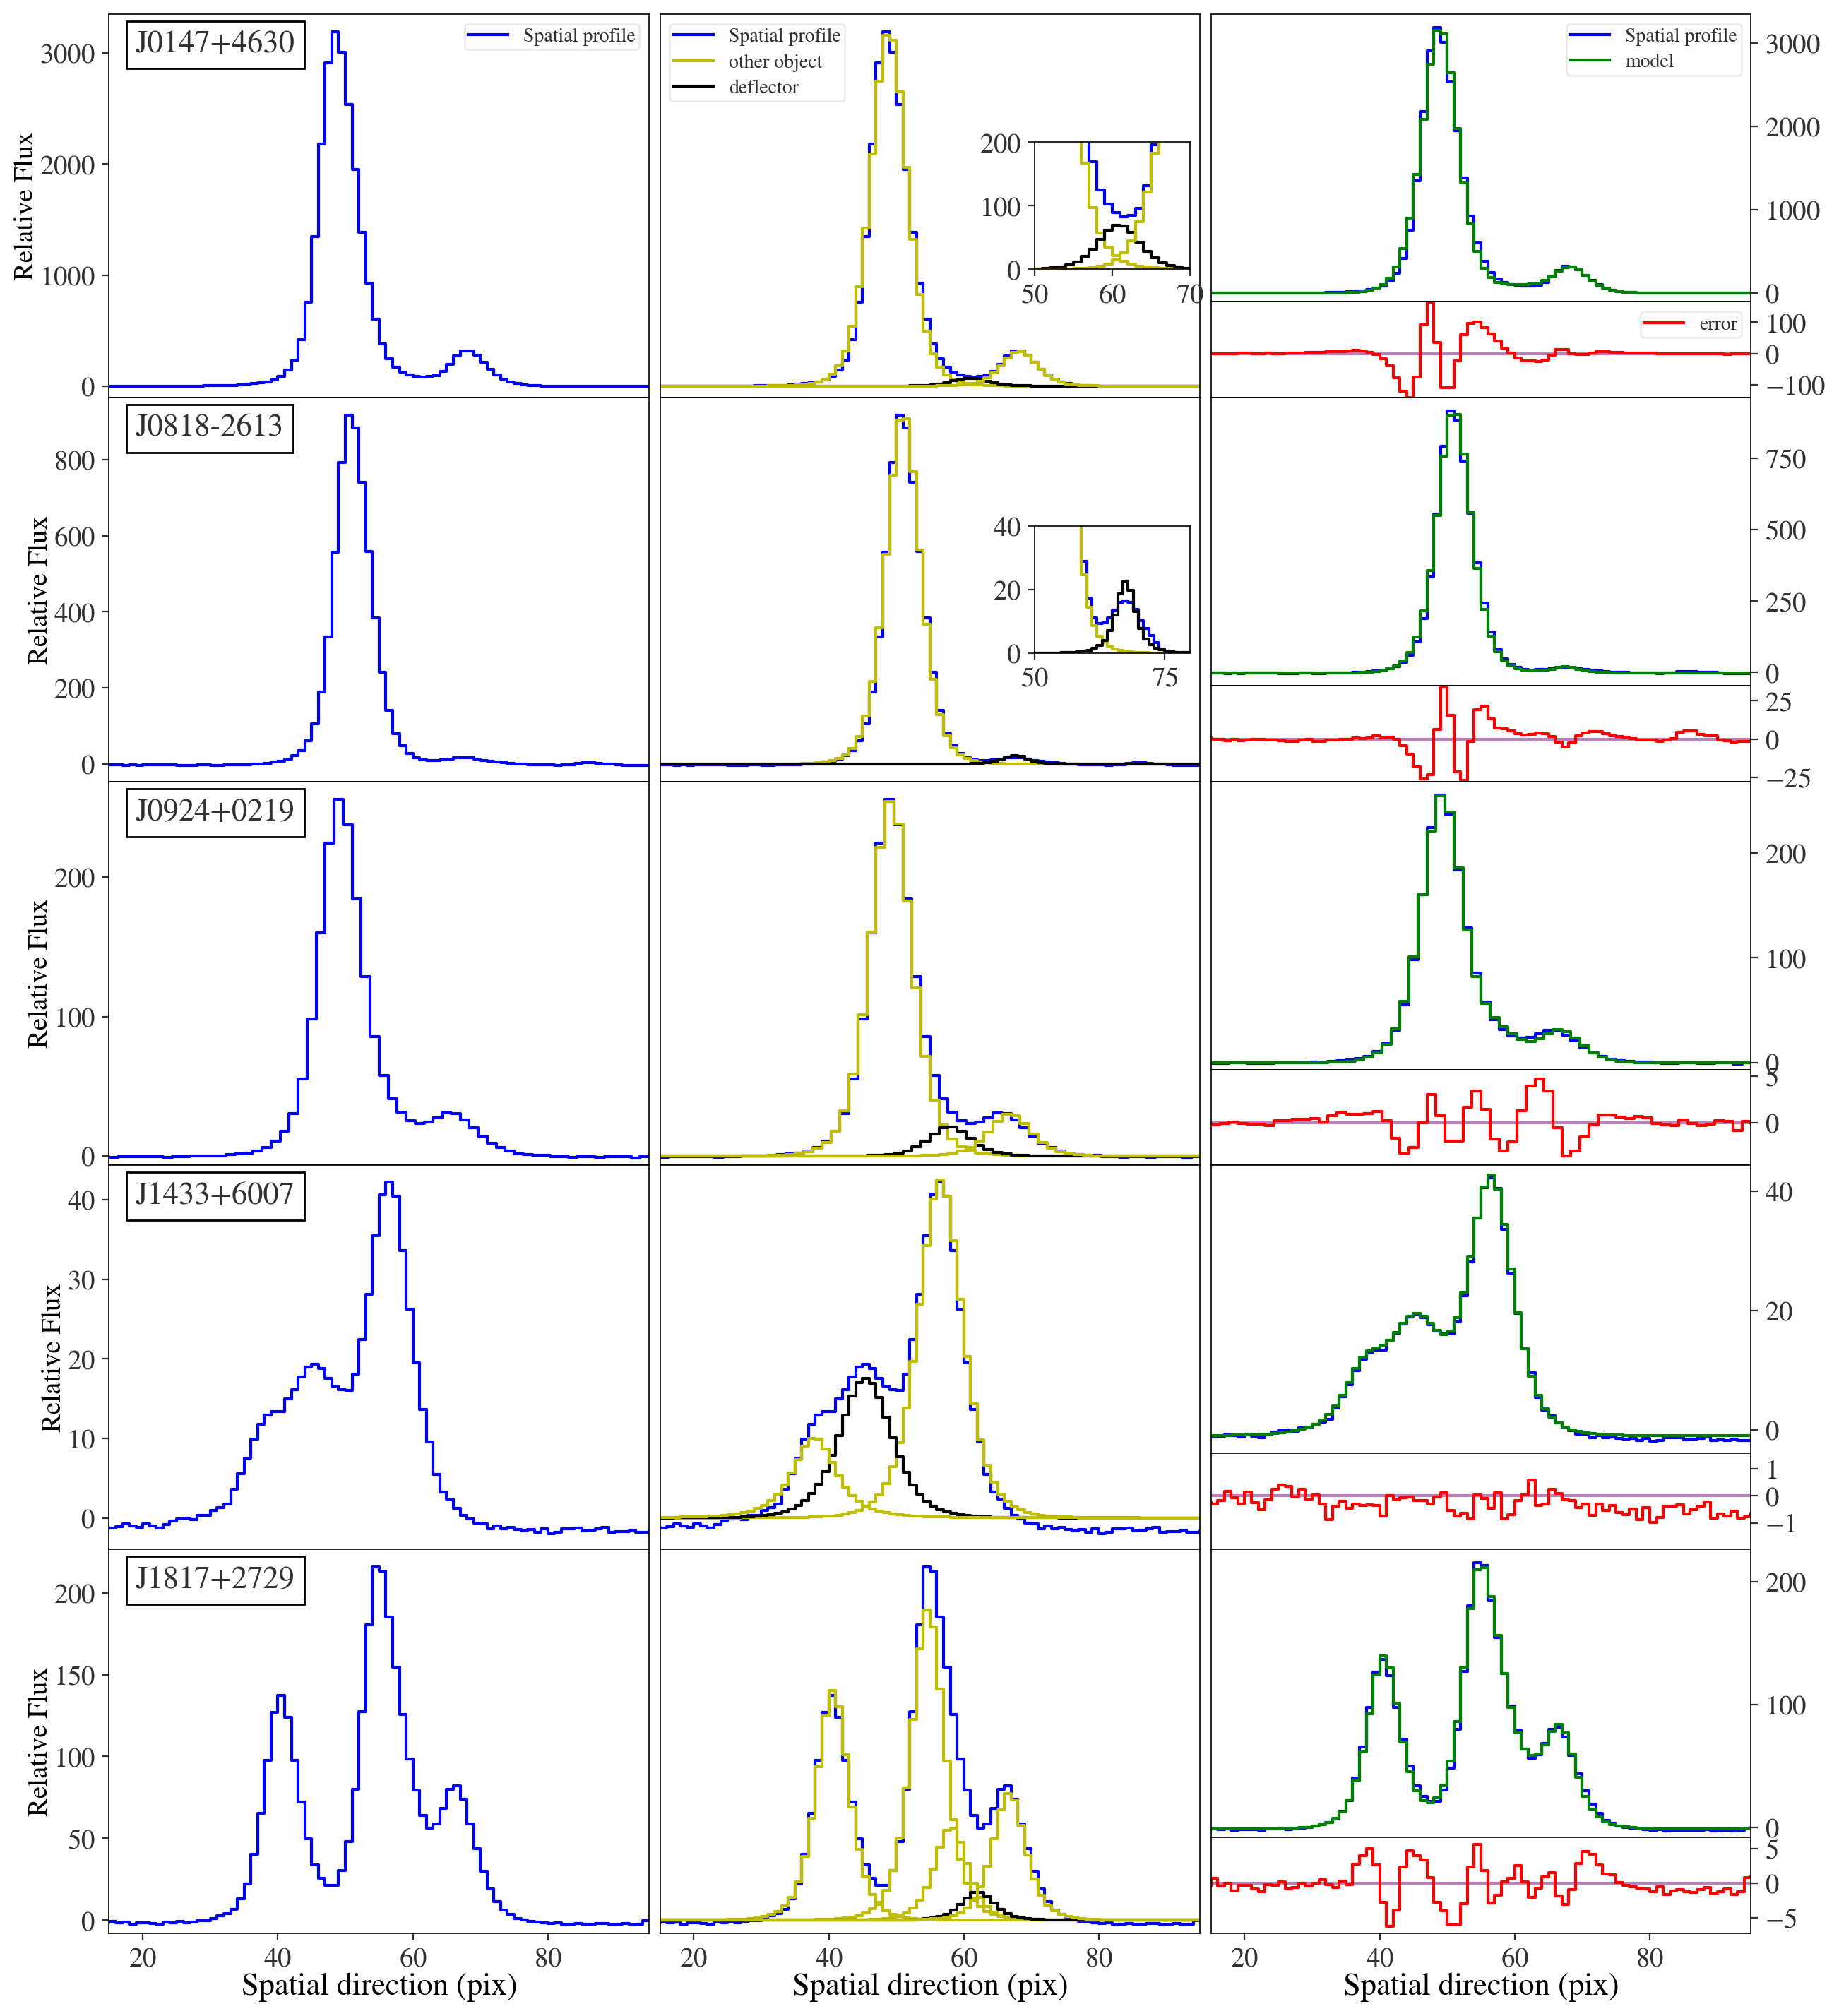

In [207]:
spec_list = [spec3, spec4, spec5, spec6, spec7]
columns = 3
rows = len(spec_list)
lens_name = np.array(['B0445+123', 'B0631+519', 'J0147+4630', 'J0818-2613', 'J0924+0219',
                      'J1433+6007', 'J1817+2729'])
deflector_comp = [2, 2, 2, 2, 4]
fig = plt.figure(figsize=(15, 18))
gs = gridspec.GridSpec(rows, columns, figure=fig)

x_lim = [[15, 95], [15, 95], [35, 95], [15, 95], [15, 95]]
y_lim_offset = [-101, -41, -5, -2, -5]

for i, spec in enumerate(spec_list):
    
    profile = spec.profile
    ax1 = fig.add_subplot(gs[i, 0])
    
    ax1.plot(profile.x, profile.y, color='b', linestyle='solid',
                           drawstyle='steps', label='Spatial profile')
    
    ax1.annotate(lens_name[i+2], (0.05, 0.9), xycoords='axes fraction',
                 fontsize=16, bbox=dict(boxstyle='square', fc='white'))
    
    ax1.set_ylabel('Relative Flux', fontsize=14)
    ax1.set_ylim(y_lim_offset[i]+np.min(profile.y), 1.05*np.max(profile.y))
    ax1.set_xlim(x_lim[i])
    
    ax2 = fig.add_subplot(gs[i, 1])
    ax2.plot(profile.x, profile.y, color='b', linestyle='solid',
                            drawstyle='steps', label='Spatial profile')
    label_m = True
    for j, md in enumerate(spec.mod0):
        mod_y = md(profile.x)
        if j==deflector_comp[i]:
            plt.plot(profile.x, mod_y, color='k',
                            drawstyle='steps', label='deflector')
            
        elif isinstance(md, models.Moffat1D):
            if label_m:
                plt.plot(profile.x, mod_y, color='y', drawstyle='steps',
                                                   label='other object')
                label_m = False
            else:
                plt.plot(profile.x, mod_y, color='y', drawstyle='steps')

    if i==0 or i==1:
        axins = inset_axes(ax2, width=1.1, height=0.9, loc=7)
        plt.plot(profile.x, profile.y, color='b', linestyle='solid',
                            drawstyle='steps')
        for j, md in enumerate(spec.mod0):
            mod_y = md(profile.x)
            if j==deflector_comp[i]:
                plt.plot(profile.x, mod_y, color='k', drawstyle='steps')
            elif isinstance(md, models.Moffat1D):
                    plt.plot(profile.x, mod_y, color='y', drawstyle='steps')
        if i==0:
            plt.xlim(50, 70)
            plt.ylim(0,  200)
        if i==1:
            plt.xlim(50, 80)
            plt.ylim(0,  40)
            
    ax2.set_yticks([])
    ax2.set_ylim(y_lim_offset[i]+np.min(profile.y), 1.05*np.max(profile.y))
    ax2.set_xlim(x_lim[i])
    
    gs_sub = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[i, 2],
                                       hspace=0, height_ratios=[3, 1])
    mod_y = spec.mod0(profile.x)
    diff = profile.y - mod_y

    ax3 = fig.add_subplot(gs_sub[0, 0])
    ax3.set_xticks([])
    ax3.plot(profile.x, profile.y, color='b', linestyle='solid',
                           drawstyle='steps', label='Spatial profile')
    ax3.plot(profile.x, mod_y, color='g', drawstyle='steps',
                                                    label='model')
    
    ax3.yaxis.set_ticks_position('right')
    ax3.set_ylim(np.min(profile.y)+y_lim_offset[i], 1.05*np.max(profile.y))
    ax3.set_xlim(x_lim[i])
    
    ax4 = fig.add_subplot(gs_sub[1, 0]) 
    ax4.plot(profile.x, diff, 'r', drawstyle='steps', label='error')
    ax4.hlines(y=0, xmin=min(profile.x), xmax=max(profile.x))
    
    ax4.yaxis.set_label_position("right")
    ax4.yaxis.set_ticks_position('right')
    ax4.set_ylim(np.min(diff[15:95])-1.0, np.max(diff[15:95])+1.0)
    ax4.set_xlim(x_lim[i])
    
    if i==0:
        ax1.legend()
        ax2.legend(loc='upper left')
        ax3.legend()
        ax4.legend()
    
    if i==len(deflector_comp)-1:
        ax1.set_xlabel('Spatial direction (pix)', fontsize=16)
        ax2.set_xlabel('Spatial direction (pix)', fontsize=16)
        ax4.set_xlabel('Spatial direction (pix)', fontsize=16)
    else:
        ax1.set_xticks([])
        ax2.set_xticks([])
        ax4.set_xticks([])
        
    plt.subplots_adjust(wspace=0.02, hspace=0.0)
    
#plt.show()
#plt.savefig('paper_plots/model_fit.pdf', format='pdf', dpi=200, bbox_inches='tight')

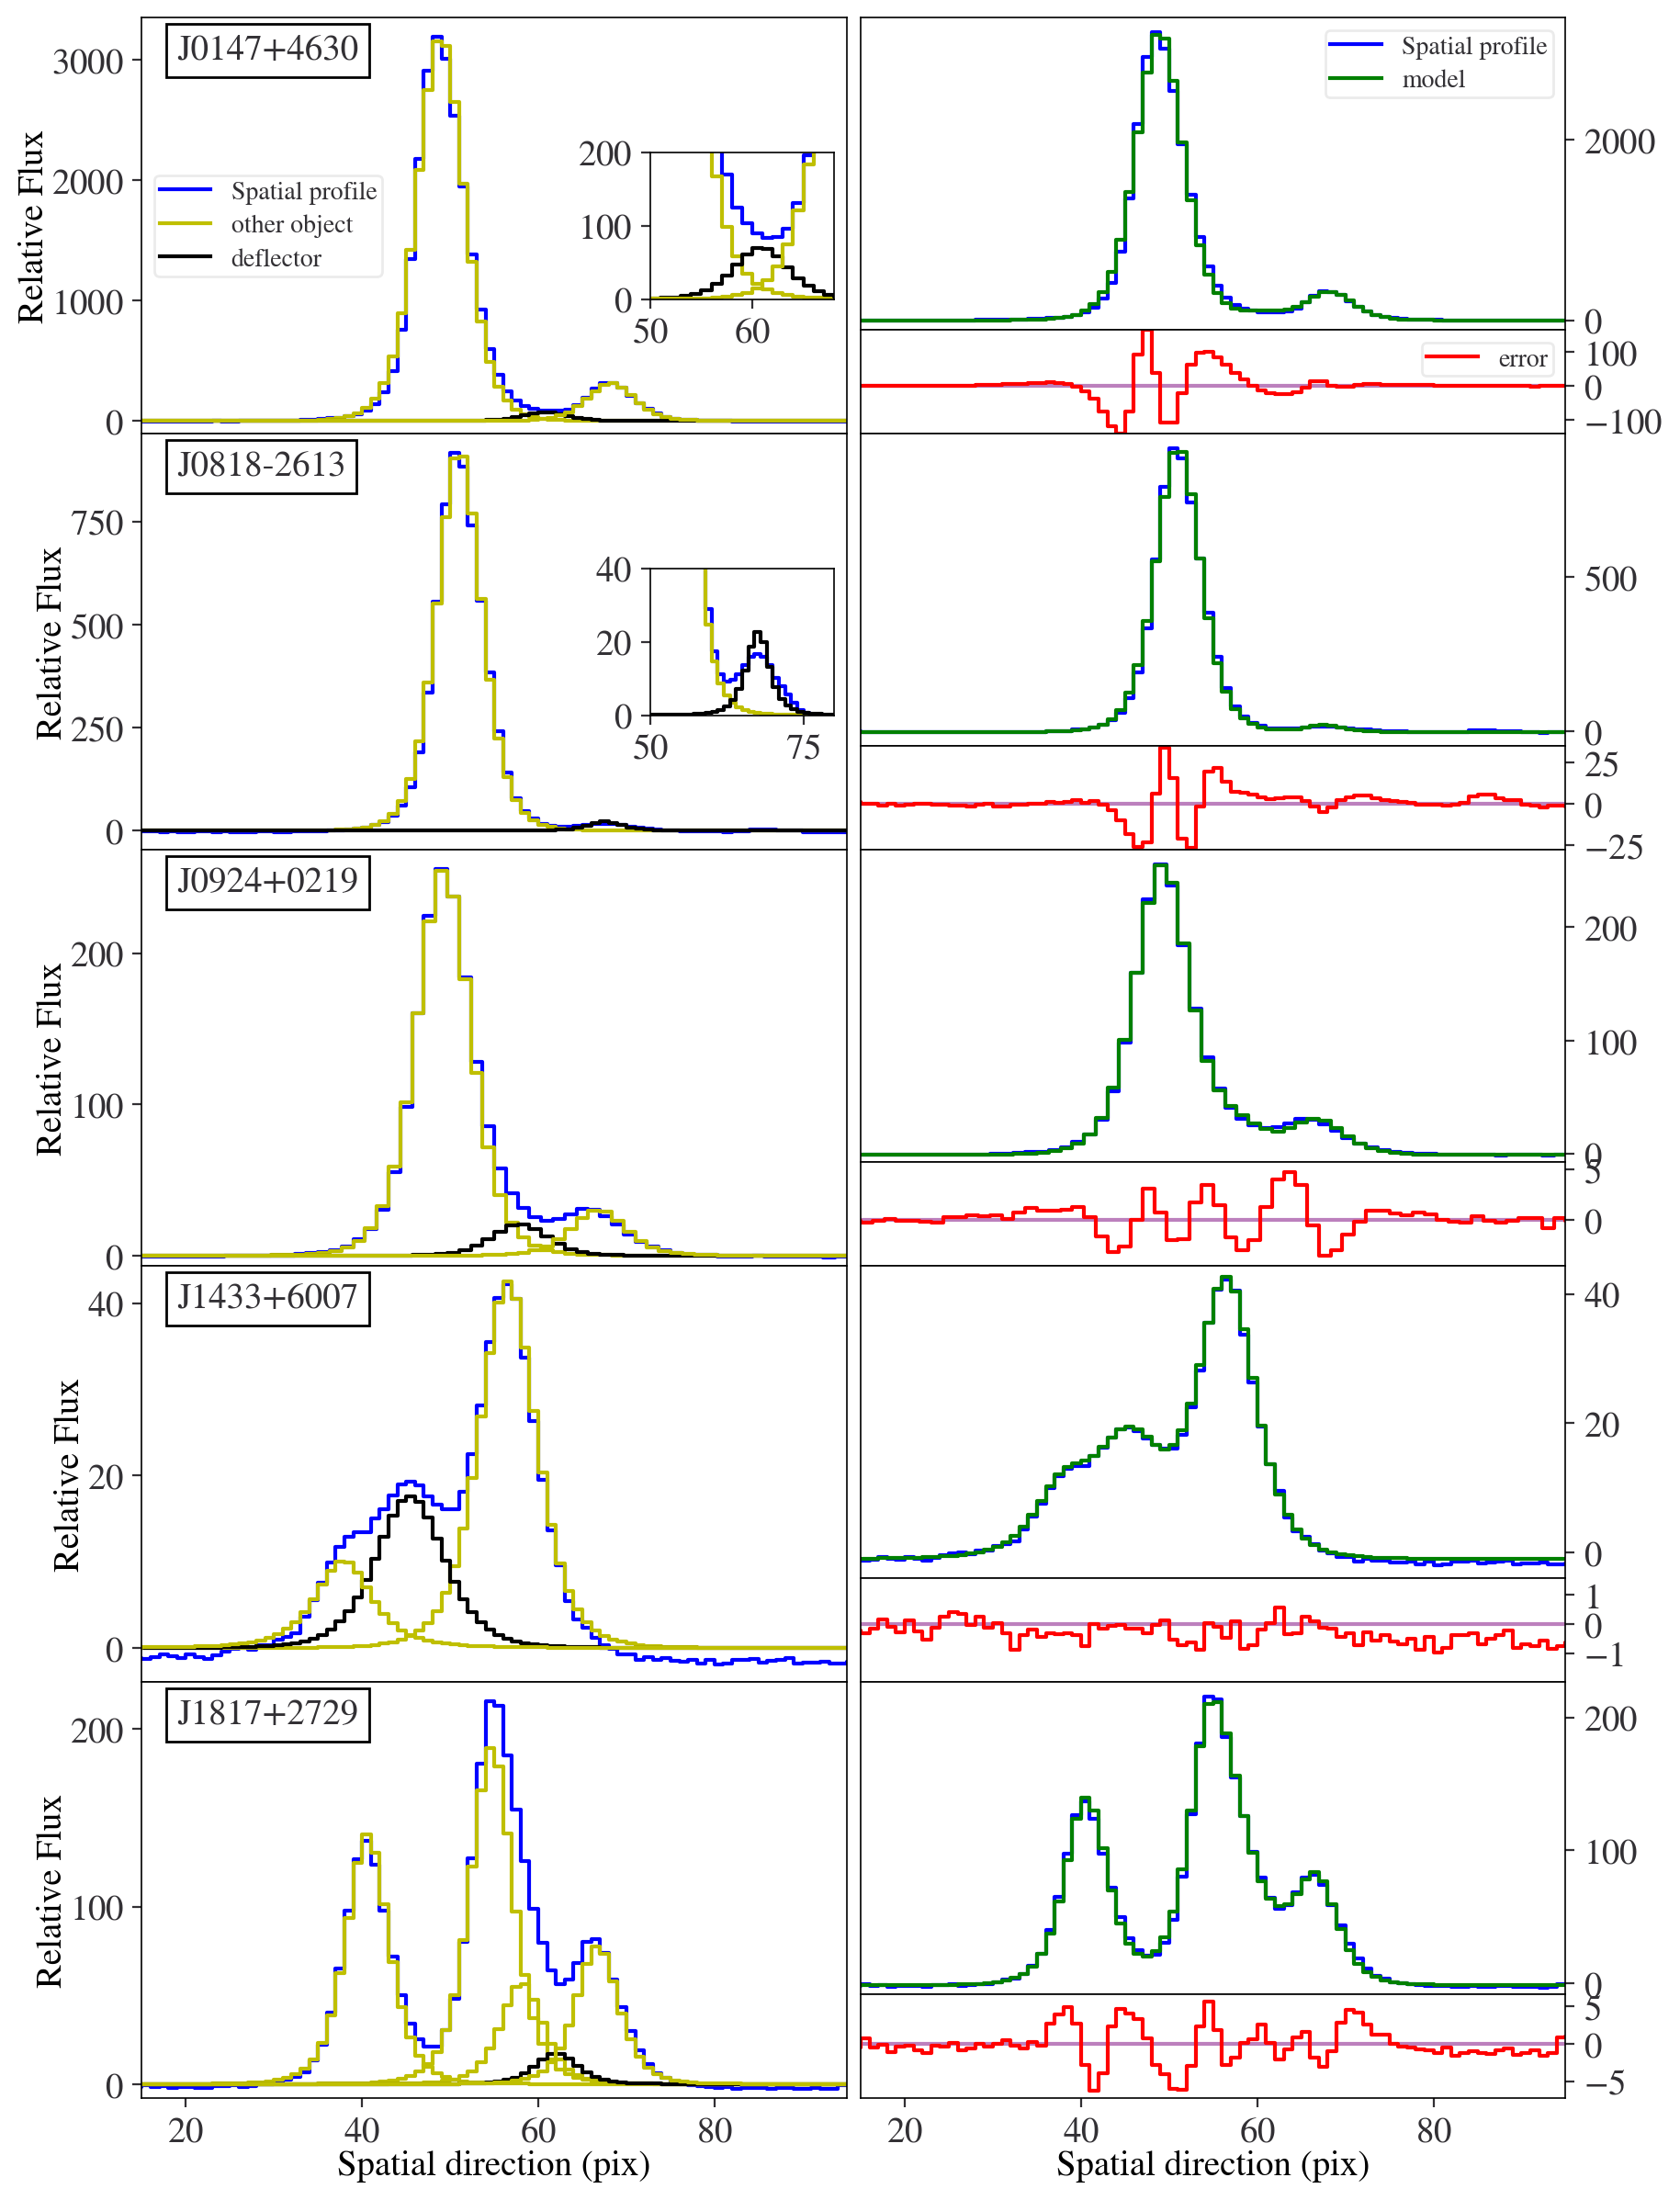

In [222]:
spec_list = [spec3, spec4, spec5, spec6, spec7]
columns = 2
rows = len(spec_list)
lens_name = np.array(['B0445+123', 'B0631+519', 'J0147+4630', 'J0818-2613', 'J0924+0219',
                      'J1433+6007', 'J1817+2729'])
deflector_comp = [2, 2, 2, 2, 4]
fig = plt.figure(figsize=(10, 15))
gs = gridspec.GridSpec(rows, columns, figure=fig)

x_lim = [[15, 95], [15, 95], [35, 95], [15, 95], [15, 95]]
y_lim_offset = [-101, -41, -5, -2, -5]

for i, spec in enumerate(spec_list):
    profile = spec.profile
    ax1 = fig.add_subplot(gs[i, 0])
    ax1.plot(profile.x, profile.y, color='b', linestyle='solid',
                            drawstyle='steps', label='Spatial profile')
    label_m = True
    for j, md in enumerate(spec.mod0):
        mod_y = md(profile.x)
        if j==deflector_comp[i]:
            plt.plot(profile.x, mod_y, color='k',
                            drawstyle='steps', label='deflector')
            
        elif isinstance(md, models.Moffat1D):
            if label_m:
                plt.plot(profile.x, mod_y, color='y', drawstyle='steps',
                                                   label='other object')
                label_m = False
            else:
                plt.plot(profile.x, mod_y, color='y', drawstyle='steps')

    if i==0 or i==1:
        axins = inset_axes(ax1, width=1.0, height=0.8, loc=7)
        plt.plot(profile.x, profile.y, color='b', linestyle='solid',
                            drawstyle='steps')
        for j, md in enumerate(spec.mod0):
            mod_y = md(profile.x)
            if j==deflector_comp[i]:
                plt.plot(profile.x, mod_y, color='k', drawstyle='steps')
            elif isinstance(md, models.Moffat1D):
                    plt.plot(profile.x, mod_y, color='y', drawstyle='steps')
        if i==0:
            plt.xlim(50, 68)
            plt.ylim(0,  200)
        if i==1:
            plt.xlim(50, 80)
            plt.ylim(0,  40)
            
    #ax1.set_yticks([])
    ax1.set_ylim(y_lim_offset[i]+np.min(profile.y), 1.05*np.max(profile.y))
    ax1.set_xlim(x_lim[i])
    ax1.annotate(lens_name[i+2], (0.05, 0.9), xycoords='axes fraction',
                 fontsize=14, bbox=dict(boxstyle='square', fc='white'),)
    
    ax1.set_ylabel('Relative Flux', fontsize=14)
    
    gs_sub = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[i, 1],
                                       hspace=0, height_ratios=[3, 1])
    mod_y = spec.mod0(profile.x)
    diff = profile.y - mod_y

    ax2 = fig.add_subplot(gs_sub[0, 0])
    ax2.set_xticks([])
    ax2.plot(profile.x, profile.y, color='b', linestyle='solid',
                           drawstyle='steps', label='Spatial profile')
    ax2.plot(profile.x, mod_y, color='g', drawstyle='steps',
                                                    label='model')
    
    ax2.yaxis.set_ticks_position('right')
    ax2.set_ylim(np.min(profile.y)+y_lim_offset[i], 1.05*np.max(profile.y))
    ax2.set_xlim(x_lim[i])
    
    ax3 = fig.add_subplot(gs_sub[1, 0]) 
    ax3.plot(profile.x, diff, 'r', drawstyle='steps', label='error')
    ax3.hlines(y=0, xmin=min(profile.x), xmax=max(profile.x))
    
    ax3.yaxis.set_label_position("right")
    ax3.yaxis.set_ticks_position('right')
    ax3.set_ylim(np.min(diff[15:95])-1.0, np.max(diff[15:95])+1.0)
    ax3.set_xlim(x_lim[i])
    
    if i==0:
        ax1.legend(loc='center left')
        ax2.legend()
        ax3.legend()
    
    if i==len(deflector_comp)-1:
        ax1.set_xlabel('Spatial direction (pix)', fontsize=14)
        ax1.set_xlabel('Spatial direction (pix)', fontsize=14)
        ax3.set_xlabel('Spatial direction (pix)', fontsize=14)
    else:
        ax1.set_xticks([])
        ax1.set_xticks([])
        ax3.set_xticks([])
        
    plt.subplots_adjust(wspace=0.02, hspace=0.0)
    
#plt.show()
plt.savefig('paper_plots/model_fit2.pdf', format='pdf', dpi=200, bbox_inches='tight')